In [2]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns 
from sklearn.model_selection import cross_val_score
from pandas import set_option

## Sites using Generator only as sources of power

In [3]:
os.chdir("/home/aimsadmin/Documents/Documents/aims/telecommunication/Generator only")
Data= pd.read_excel("Gen.xlsx",sheet_name="data").dropna(how = "any")
Sep= pd.read_excel("Gen.xlsx",sheet_name="Sep").dropna(how = "any")
Oct= pd.read_excel("Gen.xlsx",sheet_name="Oct").dropna(how = "any")
Nov= pd.read_excel("Gen.xlsx",sheet_name="Nov")
Dec= pd.read_excel("Gen.xlsx",sheet_name="Dec").dropna(how = "any")
Jan= pd.read_excel("Gen.xlsx",sheet_name="Jan").dropna(how = "any")
Feb= pd.read_excel("Gen.xlsx",sheet_name="Feb").dropna(how = "any")
Mar= pd.read_excel("Gen.xlsx",sheet_name="Mar").dropna(how = "any")
Sep.replace(' ', np.nan, inplace=True)
Oct.replace(' ', np.nan, inplace=True)
Nov.replace(' ', np.nan, inplace=True)
Dec.replace(' ', np.nan, inplace=True)
Jan.replace(' ', np.nan, inplace=True)
Feb.replace(' ', np.nan, inplace=True)
Mar.replace(' ', np.nan, inplace=True)

In [4]:
Data.head(5)

,Cluster,Site Name,DATE EFFECTIVE DE LA VISITE,DATE DE VISITE PRECEDENTE,Months,NBRE DE JOUR,Generator 1capacity (KVA),COMPTEUR HORAIRE ACTUEL GE1,ANCIEN COMPTEUR HORAIRE G1,QTE FUEL PRECEDENTE,QTE FUEL TROUVEE,QTE FUEL AJOUTEE,QTE TOTALE LAISSEE,Consumption HIS,Class,NBRE HEURES DE FONCTIONNEMENT DG1,CONSOMMATION HORAIRE DE FUEL DG1,Power Type
0,KOUSSERI,FIGUIL [ T0157 ],2017-09-26,2017-09-20,September,6,22.0,21136,20996,461.0,111.0,375.0,486.0,420.0,-1,140.0,3.0,Gen Only
1,GUIDER,DEMBO [ T1408 ],2017-09-26,2017-09-22,September,4,22.0,2522,2424,685.0,440.0,0.0,440.0,254.8,-1,98.0,2.6,Gen Only
2,GAROUA 1,BANGANA [ T2901 ],2017-09-26,2017-09-21,September,5,9.0,13284,13165,495.0,280.0,200.0,480.0,238.0,-1,119.0,2.0,Gen Only
3,GUIDER,DEMBO [ T1408 ],2017-09-26,2017-09-20,September,6,9.0,19895,19751,350.0,140.0,300.0,440.0,288.0,-1,144.0,2.0,Gen Only
4,KOUSSERI,FIGUIL [ T0157 ],2017-09-26,2017-09-21,September,5,12.5,16191,16117,154.0,2.0,300.0,302.0,148.0,-1,74.0,2.0,Gen Only


## Study of the consumption per month in diiferent Clusters

In [5]:
Data.shape

(2676, 18)

In [6]:
Monthss = Data.set_index('Months')

## Kde plot of the consumption between the month of septermber  to March 2018

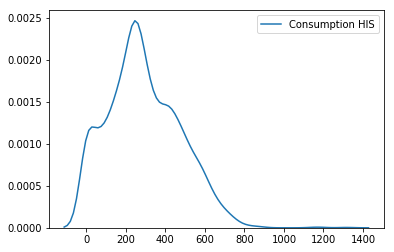

In [7]:
sns.kdeplot(Data['Consumption HIS']) 

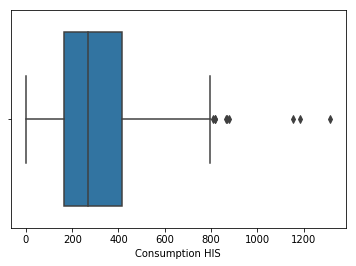

In [8]:
sns.boxplot('Consumption HIS', data= Data)

Text(0.5,1,'Trend of the fuel consumed')

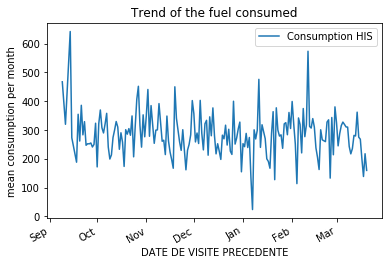

In [9]:
Data.pivot_table("Consumption HIS", index='DATE DE VISITE PRECEDENTE', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
plt.ylabel('mean consumption per month')
plt.title("Trend of the fuel consumed")

## Visualization and trend of consumption from September to March

/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.


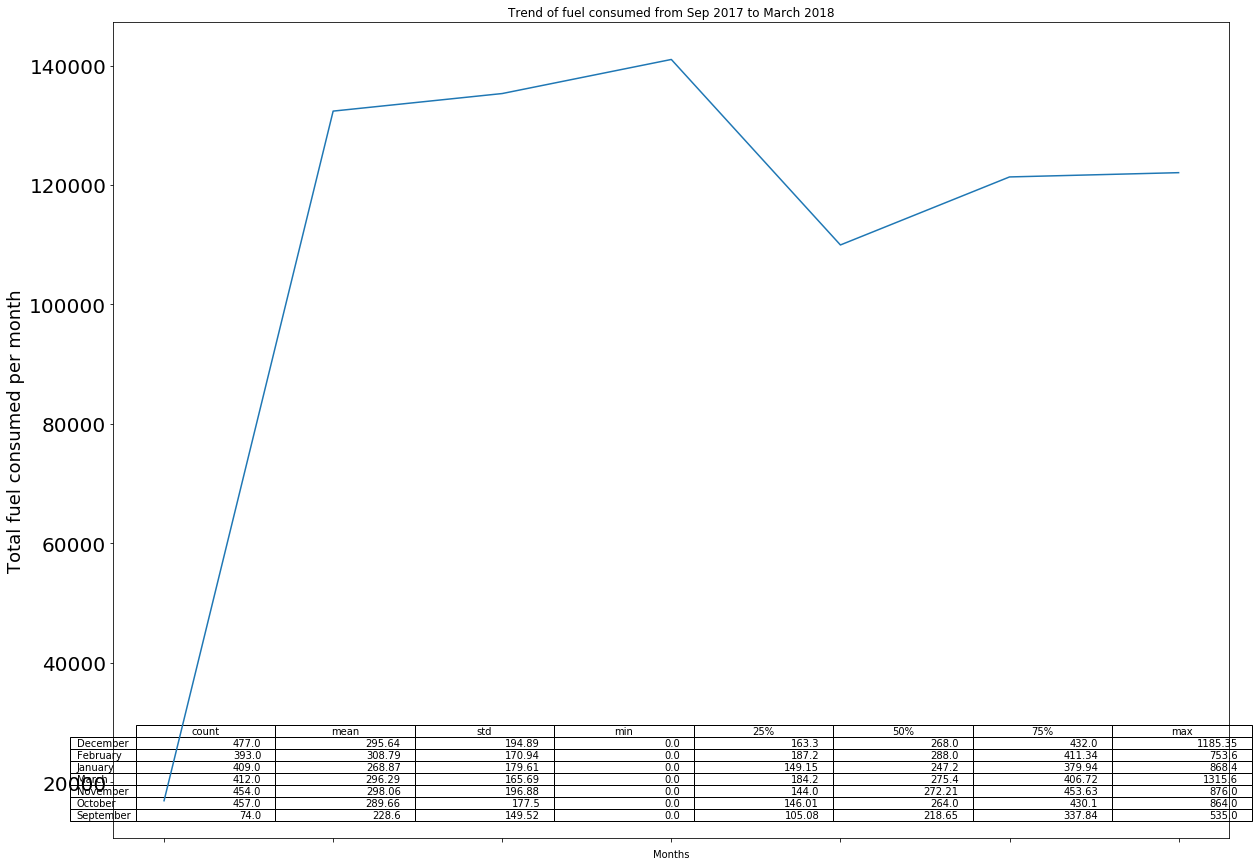

In [10]:
from pandas.tools.plotting import table
af= Data.groupby('Months', sort = False)['Consumption HIS'].sum().plot(kind= 'line', figsize=(20,15),fontsize=20,title = 'Trend of fuel consumed from Sep 2017 to March 2018')
af.set_ylabel("Total fuel consumed per month", fontsize=18);
af.get_xaxis().set_visible(True)
#fig, ax = plt.subplots(1, 1)
table(af,  np.round(Data.groupby('Months')['Consumption HIS'].describe(), 2),loc='lower left') 

#Data.groupby('Months')['Consumption HIS'].plot(ax=ax, ylim=(0,2),figsize=(10,7), legend=None)

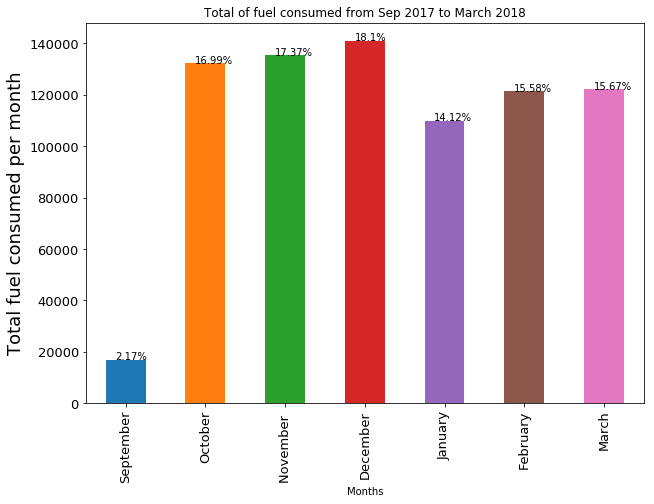

In [11]:
ax = Data.groupby('Months', sort = False)['Consumption HIS'].sum().plot(kind= 'bar', figsize=(10,7),fontsize=13,title = 'Total of fuel consumed from Sep 2017 to March 2018')



#Sep['Consumption HIS'].sum()
ax.set_ylabel("Total fuel consumed per month", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

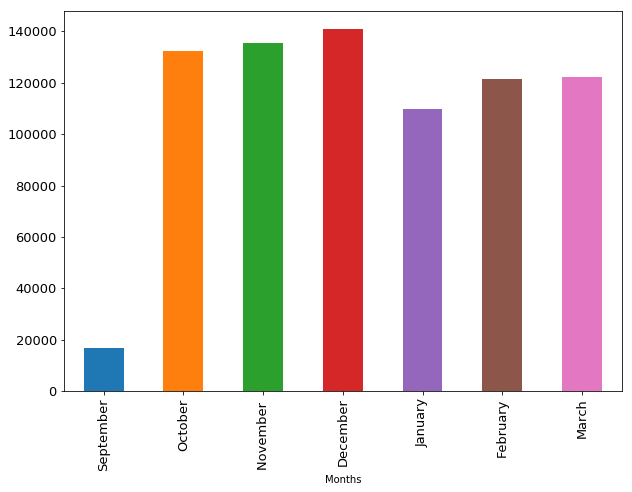

In [12]:
ax = Data.groupby('Months', sort = False )['Consumption HIS'].sum().plot(kind= 'bar', figsize=(10,7),fontsize=13)

## Fuel consumed by specific clusters in a month

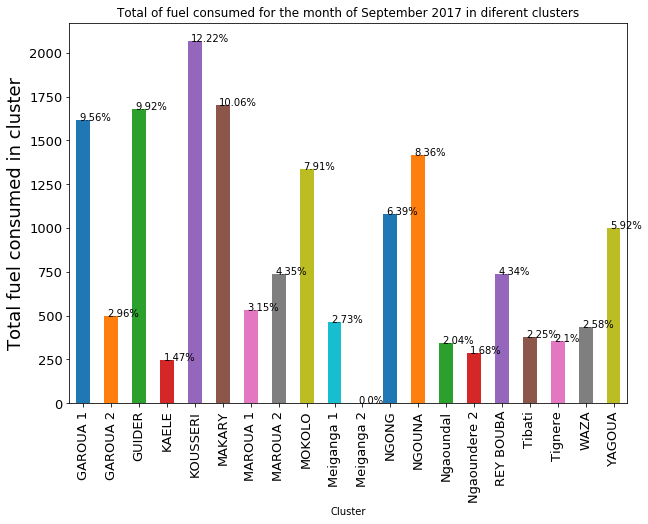

In [13]:
ax = Sep.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar', figsize=(10,7),fontsize=13,title = 'Total of fuel consumed for the month of September 2017 in diferent clusters')
#Sep['Consumption HIS'].sum()
ax.set_ylabel("Total fuel consumed in cluster", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

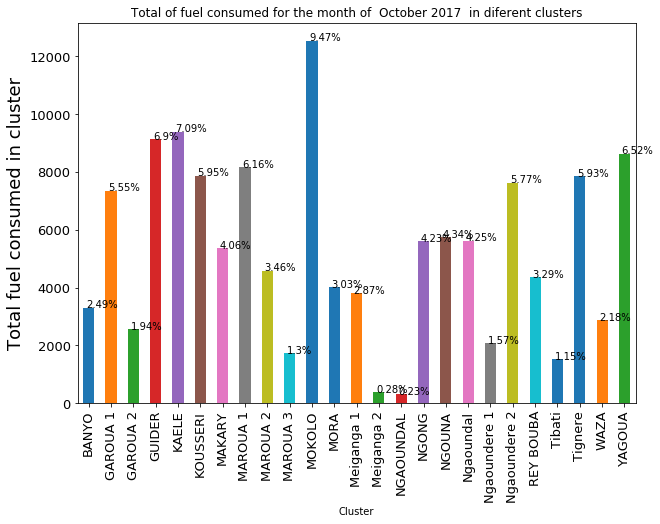

In [14]:
#Oct.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar', title = 'Total of fuel consumed for the month of October 2017 in diferent clusters')
#Oct['Consumption HIS'].sum()
ax = Oct.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar', figsize=(10,7),fontsize=13,title = 'Total of fuel consumed for the month of  October 2017  in diferent clusters')
#Sep['Consumption HIS'].sum()
ax.set_ylabel("Total fuel consumed in cluster", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

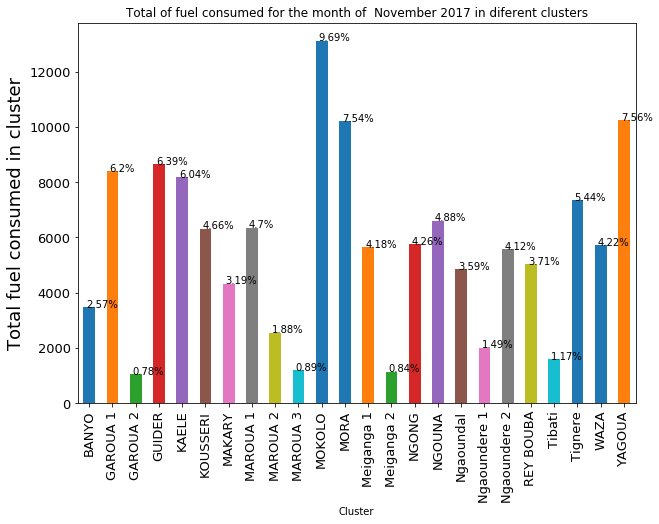

In [15]:
#Nov.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar', title = 'Total of fuel consumed for the month of November 2017 in diferent clusters')
#Nov['Consumption HIS'].sum()
ax = Nov.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar', figsize=(10,7),fontsize=13,title = 'Total of fuel consumed for the month of  November 2017 in diferent clusters')
#Sep['Consumption HIS'].sum()
ax.set_ylabel("Total fuel consumed in cluster", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

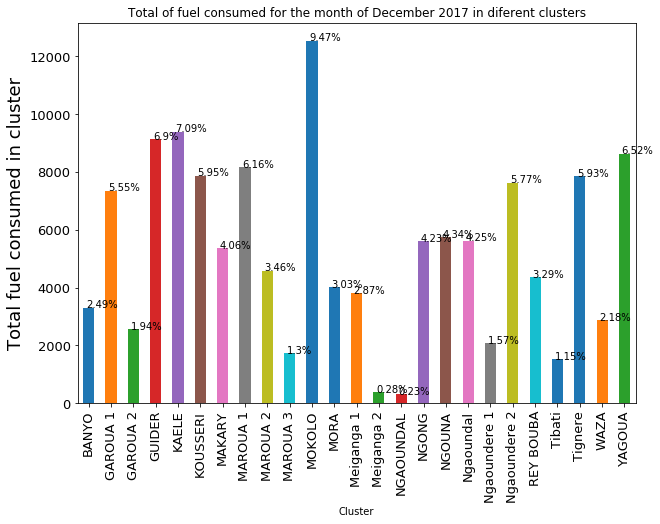

In [16]:
#Dec.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar', title = 'Total of fuel consumed for the month of December in diferent clusters')
#Dec['Consumption HIS'].sum()
ax = Oct.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar', figsize=(10,7),fontsize=13,title = 'Total of fuel consumed for the month of December 2017 in diferent clusters')
#Sep['Consumption HIS'].sum()
ax.set_ylabel("Total fuel consumed in cluster", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

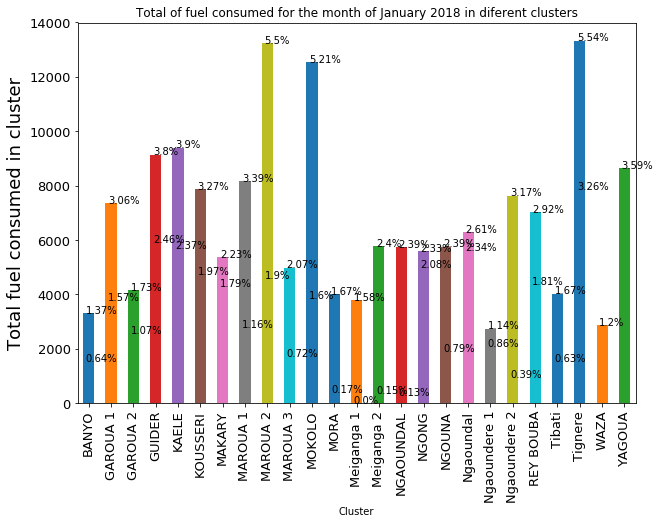

In [17]:
Jan.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar',title = 'Total of fuel consumed for the month of January 2018 in diferent clusters')
Jan['Consumption HIS'].sum()
ax = Oct.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar', figsize=(10,7),fontsize=13,title = 'Total of fuel consumed for the month of January 2018 in diferent clusters')
#Sep['Consumption HIS'].sum()
ax.set_ylabel("Total fuel consumed in cluster", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

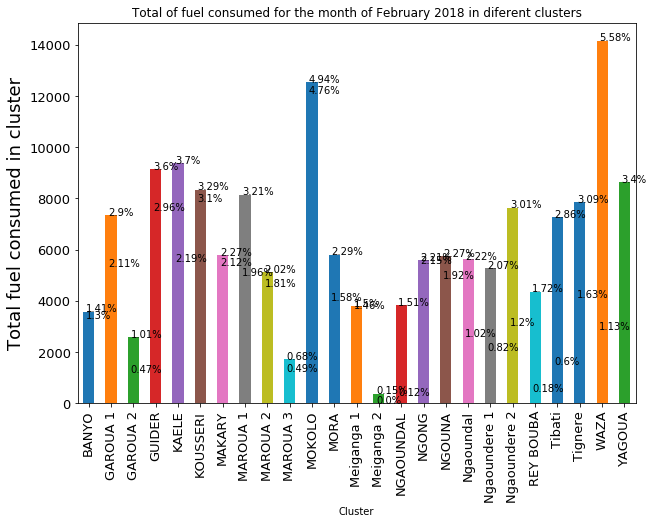

In [18]:
Feb.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar',title = 'Total of fuel consumed for the month of February 2018 in diferent clusters')
Feb['Consumption HIS'].sum()
ax = Oct.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar', figsize=(10,7),fontsize=13,title = 'Total of fuel consumed for the month of February 2018 in diferent clusters')
#Sep['Consumption HIS'].sum()
ax.set_ylabel("Total fuel consumed in cluster", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

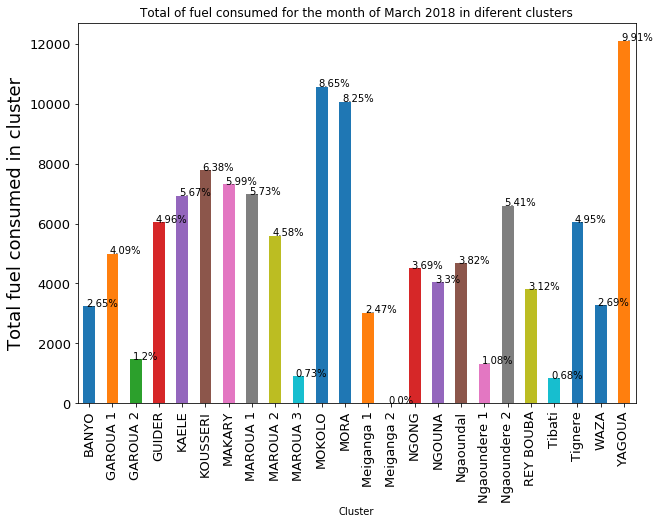

In [19]:
#Mar.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar',title = 'Total of fuel consumed for the month of March 2018 in diferent clusters')
#Mar['Consumption HIS'].sum()
ax = Mar.groupby('Cluster')['Consumption HIS'].sum().plot(kind= 'bar', figsize=(10,7),fontsize=13,title = 'Total of fuel consumed for the month of March 2018 in diferent clusters')
#Sep['Consumption HIS'].sum()
ax.set_ylabel("Total fuel consumed in cluster", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

In [20]:
 Data.groupby('Months')['Consumption HIS'].sum().sort_values( )

Months
September     16916.37
January      109966.63
February     121353.69
March        122069.52
October      132376.06
November     135317.33
December     141022.11
Name: Consumption HIS, dtype: float64

Between the month of september 2017 to March 2018 , the total fuel consumed by Generator only sites is approximately at 787731.95. This is exluding four visit made in the month of October in Tibati Cluster,SALAK [ T0879 ] site and the fuel counsumed not indicated. Alot of information is missing in Tibati Cluster

In [21]:
Data['Consumption HIS'].describe()

count    2676.000000
mean      291.114241
std       181.576590
min         0.000000
25%       163.275000
50%       266.550000
75%       416.200000
max      1315.600000
Name: Consumption HIS, dtype: float64

In [22]:
Data.groupby('Months')['Consumption HIS'].sum()

Months
December     141022.11
February     121353.69
January      109966.63
March        122069.52
November     135317.33
October      132376.06
September     16916.37
Name: Consumption HIS, dtype: float64

Fuel consumed by generator only site in different months.From the trend as from september, the fuel consumptions increase from septemebr to December with a slight drop in January then an increase in Febuary and March.

Generator only for the six months data.Description of the Data with count of 2784 sample.

Averege of fuel consumed in the months of September only in different generator. with a total of about 18400.67

Approximate fuel consumed by generator only sites in the month of Decemeber is about 135223.7,MOKOLO leading in the rate of consumptions.

Fuel consumed rated at a about 134955.83

The approximate quanitity of fuel consuems in the month of December only is about 141381.67

Fuel Consumed in the moth of March is about 122014.459

## CLUSTERS  ANALYSIS

In [23]:
indexbycluster = Data.set_index('Cluster').copy()
BANYO = indexbycluster.loc['BANYO']
YAGOUA = indexbycluster.loc['YAGOUA']
GAROUA1 = indexbycluster.loc['GAROUA 1']
GAROUA2 = indexbycluster.loc['GAROUA 2']
GUIDER = indexbycluster.loc['GUIDER']
KAELE = indexbycluster.loc['KAELE']
KOUSSERI = indexbycluster.loc['KOUSSERI']
MAKARY = indexbycluster.loc['MAKARY']
MAROUA1 = indexbycluster.loc['MAROUA 1']
MAROUA2= indexbycluster.loc['MAROUA 2']
MAROUA3= indexbycluster.loc['MAROUA 3']
Meiganga1 = indexbycluster.loc['Meiganga 1']
Meiganga2 = indexbycluster.loc['Meiganga 2']
MOKOLO = indexbycluster.loc['MOKOLO']
MORA = indexbycluster.loc['MORA']
Ngaoundal = indexbycluster.loc['Ngaoundal']
Ngaoundere1 = indexbycluster.loc['Ngaoundere 1']
Ngaoundal2 = indexbycluster.loc['Ngaoundere 2']
NGONG = indexbycluster.loc['NGONG']
NGOUNA = indexbycluster.loc['NGOUNA']
REYBOUBA= indexbycluster.loc['REY BOUBA']
Tibati = indexbycluster.loc['Tibati']
Tignere = indexbycluster.loc['Tignere']
WAZA= indexbycluster.loc['WAZA']
YAGOUA = indexbycluster.loc['YAGOUA']


In [24]:
Data[['Consumption HIS','NBRE HEURES DE FONCTIONNEMENT DG1',]].dropna().describe()

,Consumption HIS,NBRE HEURES DE FONCTIONNEMENT DG1
count,2676.000000,2676.000000
mean,291.114241,163.436472
std,181.576590,96.535578
min,0.000000,0.000000
25%,163.275000,91.000000
50%,266.550000,169.000000
75%,416.200000,239.000000
max,1315.600000,816.000000


In [25]:
BANYO[['Consumption HIS','NBRE HEURES DE FONCTIONNEMENT DG1']].dropna().describe()

,Consumption HIS,NBRE HEURES DE FONCTIONNEMENT DG1
count,32.000000,32.000000
mean,561.603125,240.250000
std,83.476044,41.784393
min,365.500000,171.000000
25%,531.525000,216.000000
50%,554.350000,239.500000
75%,612.300000,248.000000
max,722.400000,400.000000


In [26]:
BANYO[['NBRE HEURES DE FONCTIONNEMENT DG1']].sum()/39#BANYO[['Consumption HIS','NBRE HEURES DE FONCTIONNEMENT DG1']]

NBRE HEURES DE FONCTIONNEMENT DG1    197.128205
dtype: float64

Text(0.5,1,'Running hours of the generator')

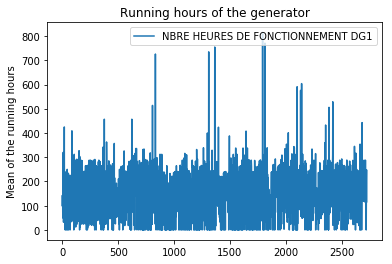

In [27]:
Data[['NBRE HEURES DE FONCTIONNEMENT DG1']].plot()
plt.ylabel('Mean of the running hours');
plt.title("Running hours of the generator")

Text(0.5,1,'Fuel consumed by different Generator capacity')

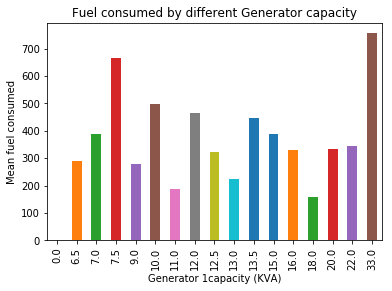

In [28]:
Data.groupby("Generator 1capacity (KVA)")['Consumption HIS'].mean().plot(kind='bar')
plt.ylabel('Mean fuel consumed');
plt.title("Fuel consumed by different Generator capacity")

Considering the whole clusters and the fuel consumed form the six months data, Generator with capacity of 33 had a mean of approximately 750. Generator with the capacity of 7.5 had a mean consumption of about 680.The capacity of 10 and 12 had a about 550 and 450 respectively.
The generatot of capacity 12.5,13,20,22 had an a mean consumed of 340. Other generators with  mean of below 300 includes the generator of camapcity 6.5,9,11,18 and 6,5*2.

High mean with specific generator might be as a result of the high number of generator using that make.

## YAGOUA  Cluster 

YAGOUA has capacity of 9, 12.5,13 and 22 with  13 visit consuming more fuel than other type of generator. 

Text(0.5,1,'Fuel consumed by different Generator capacity in YAGOUA Cluster')

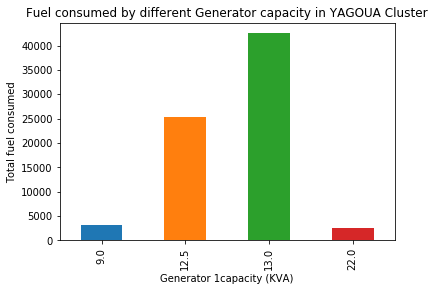

In [29]:
YAGOUA.groupby("Generator 1capacity (KVA)")['Consumption HIS'].sum().plot(kind='bar')
plt.ylabel('Total fuel consumed');
plt.title("Fuel consumed by different Generator capacity in YAGOUA Cluster")

Text(0.5,1,'Fuel consumed by in different sites of YAGOUA cluster')

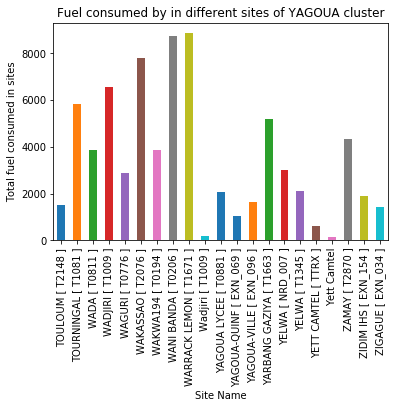

In [30]:
YAGOUA.groupby('Site Name')['Consumption HIS'].sum().plot(kind = 'bar')#21 site
plt.ylabel('Total fuel consumed in sites');
plt.title("Fuel consumed by in different sites of YAGOUA cluster")

sum of fuel consumed per cluster in six months indicated Mokolo cluster consumed almost 80000 within the six momths. followed by Yagoua ,Guider and Kousseri.  The high consumptions in this sites might be as a results of the high number of sites in this clusters as YAGOUA cluster has a total of 21 sites using Generator only. 

,NBRE DE JOUR,Generator 1capacity (KVA),COMPTEUR HORAIRE ACTUEL GE1,ANCIEN COMPTEUR HORAIRE G1,QTE FUEL PRECEDENTE,QTE FUEL TROUVEE,QTE FUEL AJOUTEE,QTE TOTALE LAISSEE,Consumption HIS,Class,NBRE HEURES DE FONCTIONNEMENT DG1,CONSOMMATION HORAIRE DE FUEL DG1
NBRE DE JOUR,1.000000,-0.226689,-0.176435,-0.183548,0.290421,-0.003937,0.211684,0.140235,0.468660,0.276425,0.647668,-0.297216
Generator 1capacity (KVA),-0.226689,1.000000,0.142138,0.143965,0.148569,0.081563,0.110273,0.142938,0.171020,0.224825,-0.169210,0.721751
COMPTEUR HORAIRE ACTUEL GE1,-0.176435,0.142138,1.000000,0.999939,-0.087839,-0.164309,0.051080,-0.101048,0.120528,0.040001,-0.022439,0.308313
ANCIEN COMPTEUR HORAIRE G1,-0.183548,0.143965,0.999939,1.000000,-0.091575,-0.164182,0.047720,-0.103222,0.111526,0.036301,-0.033501,0.310640
QTE FUEL PRECEDENTE,0.290421,0.148569,-0.087839,-0.091575,1.000000,0.841960,0.154985,0.807618,0.403522,0.283990,0.339054,0.104193
QTE FUEL TROUVEE,-0.003937,0.081563,-0.164309,-0.164182,0.841960,1.000000,-0.132913,0.743734,-0.009513,0.065734,-0.007869,0.007040
QTE FUEL AJOUTEE,0.211684,0.110273,0.051080,0.047720,0.154985,-0.132913,1.000000,0.561581,0.393890,0.258146,0.301731,0.152684
QTE TOTALE LAISSEE,0.140235,0.142938,-0.101048,-0.103222,0.807618,0.743734,0.561581,1.000000,0.259804,0.228574,0.198120,0.109912
Consumption HIS,0.468660,0.171020,0.120528,0.111526,0.403522,-0.009513,0.393890,0.259804,1.000000,0.514350,0.809819,0.305178
Class,0.276425,0.224825,0.040001,0.036301,0.283990,0.065734,0.258146,0.228574,0.514350,1.000000,0.332934,0.225736


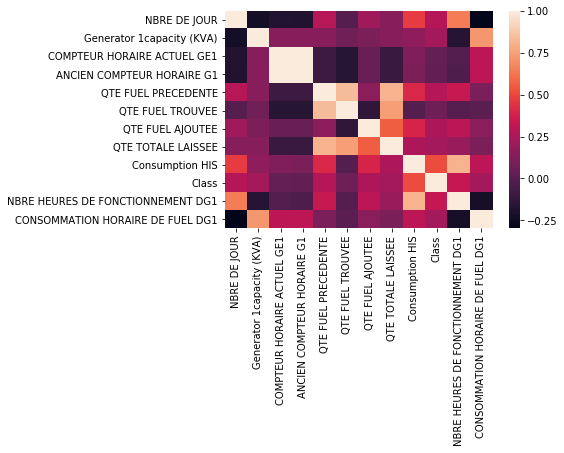

In [31]:
correlalation = Data.corr()
sns.heatmap(correlalation)
plt.show
correlalation